In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()
digits['data'][5].reshape(8,8) #색상값들..

array([[ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 14.,  0.,  0.],
       [ 0.,  0., 13., 16., 15., 10.,  1.,  0.],
       [ 0.,  0., 11., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  7., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  4., 16.,  9.,  0.],
       [ 0.,  0.,  5.,  4., 12., 16.,  4.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.]])

(1797, 64)
label :  5


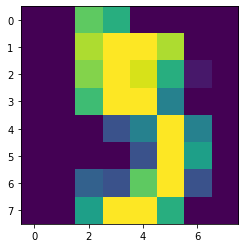

In [3]:
print(digits['data'].shape)   #1797장의 이미지, (8 X 8)
print( "label : ",digits['target'][5])
plt.imshow(digits['data'][5].reshape(8,8) )   #8픽셀 이미지가 들어가 있는..
plt.show()

In [4]:
digits['target_names']   #총 10개의 숫자가 들어가 있다..
np.unique(digits['target'], return_counts=True) 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

In [5]:
from sklearn.model_selection import train_test_split

X, y= digits['data'], digits['target'] == 9
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [6]:
# print(digits['target'].shape)
# print(len(y))
np.unique(y, return_counts=True)   #목적변수 비율이 불균형. 약 90%가 false //

(array([False,  True]), array([1617,  180], dtype=int64))

In [7]:
from sklearn.dummy import DummyClassifier
dc = DummyClassifier(strategy="most_frequent")  # most_frequency :한쪽으로 쏠린다.
dc.fit(X_train, y_train)
dc.score(X_test, y_test)

0.9

In [8]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test,y_test)

0.9888888888888889

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.9777777777777777

In [10]:
from sklearn.tree import DecisionTreeClassifier    #tree가 작업 할때 어떤 속성을 먼저 할지 고정하지 않으면 계속 수치가 바뀐다.

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)
tree.score(X_test,y_test)

0.9355555555555556

In [11]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, dc.predict(X_test)))
print(confusion_matrix(y_test, tree.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))

[[405   0]
 [ 45   0]]
[[396   9]
 [ 20  25]]
[[400   5]
 [  5  40]]


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(recall_score(y_test, dc.predict(X_test)))
print(recall_score(y_test, tree.predict(X_test)))
print(recall_score(y_test, lr.predict(X_test)))
print('*' * 20)
print(precision_score(y_test, dc.predict(X_test)))
print(precision_score(y_test, tree.predict(X_test)))
print(precision_score(y_test, lr.predict(X_test)))
print('*' * 20)
print(f1_score(y_test, dc.predict(X_test)))
print(f1_score(y_test, tree.predict(X_test)))
print(f1_score(y_test, lr.predict(X_test)))

0.0
0.5555555555555556
0.8888888888888888
********************
0.0
0.7352941176470589
0.8888888888888888
********************
0.0
0.6329113924050633
0.8888888888888888


c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dc.predict(X_test)))
print(classification_report(y_test, tree.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

       False       0.90      1.00      0.95       405
        True       0.00      0.00      0.00        45

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.81      0.90      0.85       450

              precision    recall  f1-score   support

       False       0.95      0.98      0.96       405
        True       0.74      0.56      0.63        45

    accuracy                           0.94       450
   macro avg       0.84      0.77      0.80       450
weighted avg       0.93      0.94      0.93       450

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       405
        True       0.89      0.89      0.89        45

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450



c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_blobs(n_samples=(400, 50), 
                                   centers=2, 
                                   cluster_std=[7.0, 2],
                                   random_state=42)

c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [15]:
print(X.shape)
print(X[:5])
print(np.unique(y, return_counts=True))    #불균형 데이터

(450, 2)
[[ 9.23767508  1.24749256]
 [-2.47249173  9.34315028]
 [-3.61525291  6.02611864]
 [-0.85989572 14.41034249]
 [ 5.80773521  1.2545855 ]]
(array([0, 1]), array([400,  50], dtype=int64))


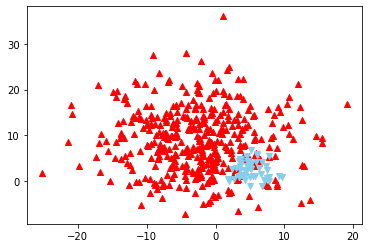

In [16]:
plt.scatter(X[y==0, 0], X[y==0, 1], marker='^' , color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], marker='v', color='skyblue')
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [18]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.67      0.77      0.71        13

    accuracy                           0.93       113
   macro avg       0.82      0.86      0.84       113
weighted avg       0.93      0.93      0.93       113



In [19]:
y_pred = svc.decision_function(X_test) > -0.8   #-0.8보다 작으면 False, -0.8보다 크면 True 판단   #0.8은 임의값. 다른수 줘도 상관 없음.
print(classification_report(y_test, y_pred))        #

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       100
           1       0.54      1.00      0.70        13

    accuracy                           0.90       113
   macro avg       0.77      0.95      0.82       113
weighted avg       0.95      0.90      0.91       113



c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
No handles with labels found to put in legend.


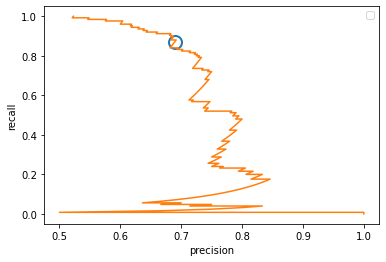

In [22]:
from sklearn.metrics import precision_recall_curve       

X, y = mglearn.datasets.make_blobs(n_samples=(4000, 500), 
                                   centers=2, 
                                   cluster_std=[7.0, 2],
                                   random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

svc = SVC(probability=True)
svc.fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

idx = np.argmin(np.abs(thresholds))   #0에 근접한 임계값 위치 찾기    
# thresholds(임계치)에 따라 precision(정밀도), recall(재현율) 값이 달라진다.
plt.plot(precision[idx], recall[idx],
         marker='o',mew=2, markersize=13, fillstyle='none')  # mew :마커 선 굵기

plt.plot(precision, recall)
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc='best')
plt.show()

In [27]:
from sklearn.metrics import average_precision_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))  #accuracy
print(svc.score(X_test, y_test)) #accuracy
print("*"*20)
print(average_precision_score(y_test, lr.predict_proba(X_test)[:,1]))  #평균 정밀도
print(average_precision_score(y_test, svc.predict_proba(X_test)[:,1]))  #평균 정밀도
# average_precision_score(y_test, svc.predict_proba(X_test))-> svc.predict_proba(X_test)은 2차원 배열

0.8586666666666667
0.9422222222222222
********************
0.376266528731415
0.7436313954850132


In [ ]:
# ROC,AUC    => 여러 임꼐값에서 분류기의 특성을 분석 => TPR(진짜양성비율),FPR(거짓양성비율)을 나타낸다.

c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
No handles with labels found to put in legend.


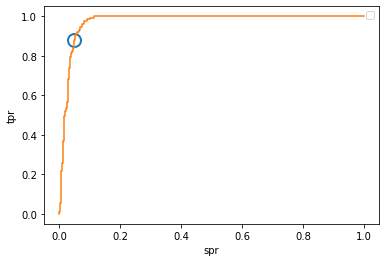

In [28]:
from sklearn.metrics import roc_curve       

X, y = mglearn.datasets.make_blobs(n_samples=(4000, 500), 
                                   centers=2, 
                                   cluster_std=[7.0, 2],
                                   random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

svc = SVC(probability=True)
svc.fit(X_train, y_train)

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))     
idx = np.argmin(np.abs(thresholds))   #0에 근접한 임계값 위치 찾기    

plt.plot(fpr[idx], tpr[idx],
         marker='o',mew=2, markersize=13, fillstyle='none')  # mew :마커 선 굵기

plt.plot(fpr, tpr)
plt.xlabel("spr")
plt.ylabel("tpr")
plt.legend(loc='best')
plt.show()

In [29]:
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))  #accuracy
print(svc.score(X_test, y_test)) #accuracy
print("*"*20)
print(roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))  # auc
print(roc_auc_score(y_test, svc.predict_proba(X_test)[:,1]))  # auc

0.8586666666666667
0.9422222222222222
********************
0.9096319999999999
0.9746


In [ ]:
# 다중분류평가

In [30]:
from sklearn.model_selection import train_test_split
digits = load_digits()
X, y= digits['data'], digits['target'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [31]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
print(lr.score(X_test,y_test))

0.9533333333333334


In [33]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.91      0.89      0.90        46
           2       1.00      0.98      0.99        44
           3       0.98      1.00      0.99        46
           4       0.96      1.00      0.98        45
           5       0.96      0.98      0.97        46
           6       0.98      0.98      0.98        45
           7       0.96      0.98      0.97        45
           8       0.82      0.84      0.83        43
           9       0.98      0.91      0.94        45

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [36]:
print(f1_score(y_test, lr.predict(X_test), average = "weighted"))
print(f1_score(y_test, lr.predict(X_test), average = "macro"))

0.9533309163774376
0.9528544497385683


In [38]:
# 이진 분류일 경우 predict_proba, decision_funtion 결과 사용 가능
# 다중 분류일 경우 predict_proba만 사용 가능 + multi_class 분류 방식 지정 필수
# print(roc_auc_score(y_test, lr.decision_function(X_test),multi_class'ovr))
print( roc_auc_score(y_test, lr.predict_proba(X_test), multi_class='ovr'))

0.9987809934152473


In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_test, y_test, scoring="accuracy")
print(scores)
# cross_val_score에서 다중 분류일 경우 scoring=은 "accuracy"만 지원
# cross_val_score(lr, X_test, y_test, scoring="roc_auc")   ->오류

[0.95555556 0.94444444 0.95555556 0.96666667 0.98888889]
